In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/phishing-website-dataset/dataset.csv


> *flask app with api capability has been made and code can be find in https://github.com/tenzin3/PhishingWebsiteDetection*

> *Dataset credit:> https://www.kaggle.com/datasets/akashkr/phishing-website-dataset*

> *Description and labeling of data columns credit goes to :> https://www.kaggle.com/code/akashkr/phishing-url-eda-and-modelling.*

In [2]:
dataset = pd.read_csv('/kaggle/input/phishing-website-dataset/dataset.csv')
dataset.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


> *1 means legitimate, 0 is suspicious and -1 is phishing.*

In [3]:
dataset['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [4]:
dataset['Page_Rank'].value_counts()

-1    8201
 1    2854
Name: Page_Rank, dtype: int64

> *PageRank
PageRank is a value ranging from “0” to “1”. PageRank aims to measure how important a webpage is on the Internet. The greater the PageRank value the more important the webpage. In our datasets, we find that about 95% of phishing webpages have no PageRank. Moreover, we find that the remaining 5% of phishing webpages may reach a PageRank value up to “0.2”.
Rule: IF
{PageRank<0.2 → Phishing
{Otherwise → Legitimate*

In [5]:
dataset['Google_Index'].value_counts()

 1    9516
-1    1539
Name: Google_Index, dtype: int64

> *Google Index
This feature examines whether a website is in Google’s index or not. When a site is indexed by Google, it is displayed on search results (Webmaster resources, 2014). Usually, phishing webpages are merely accessible for a short period and as a result, many phishing webpages may not be found on the Google index.
Rule: IF
{Webpage Indexed by Google → Legitimate
{Otherwise → Phishing*

In [6]:
dataset['URLURL_Length'].value_counts()

-1    8960
 1    1960
 0     135
Name: URLURL_Length, dtype: int64

> *Long URL to Hide the Suspicious Part
Phishers can use long URL to hide the doubtful part in the address bar. For example: http://federmacedoadv.com.br/3f/aze/ab51e2e319e51502f416dbe46b773a5e/?cmd=_home&amp;dispatch=11004d58f5b74f8dc1e7c2e8dd4105e811004d58f5b74f8dc1e7c2e8dd4105e8@phishing.website.html To ensure accuracy of our study, we calculated the length of URLs in the dataset and produced an average URL length. The results showed that if the length of the URL is greater than or equal 54 characters then the URL classified as phishing. By reviewing our dataset we were able to find 1220 URLs lengths equals to 54 or more which constitute 48.8% of the total dataset size. We have been able to update this feature rule by using a method based on frequency and thus improving upon its accuracy.
RULE: IF
{URL length<54 → feature = Legitimate
{else if URL length≥54 and ≤75 → feature = Suspicious
{otherwise→ feature = Phishing*

In [7]:
dataset['having_At_Symbol'].value_counts()

 1    9400
-1    1655
Name: having_At_Symbol, dtype: int64

> *URL’s having “@” Symbol
Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.
RULE: IF
{Url Having @ Symbol→ Phishing
{Otherwise→ Legitimate*

In [8]:
dataset['double_slash_redirecting'].value_counts()

 1    9626
-1    1429
Name: double_slash_redirecting, dtype: int64

> *Redirecting using “//”
The existence of “//” within the URL path means that the user will be redirected to another website. An example of such URL’s is: “http://www.legitimate.com//http://www.phishing.com”. We examin the location where the “//” appears. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.
RULE: IF
{The Position of the Last Occurrence of "//\" " in the URL > 7→ Phishing
{Otherwise→ Legitimate*

In [9]:
dataset['Prefix_Suffix'].value_counts()

-1    9590
 1    1465
Name: Prefix_Suffix, dtype: int64

> *Adding Prefix or Suffix Separated by (-) to the Domain
The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. For example http://www.Confirme-paypal.com/.
RULE: IF
{Domain Name Part Includes (-) Symbol → Phishing
{Otherwise → Legitimate*

In [10]:
selected_features=['URLURL_Length', 'having_At_Symbol','double_slash_redirecting', 'Prefix_Suffix', 'Page_Rank', 'Google_Index','Result']
df = dataset[selected_features]
df.head()

,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,Page_Rank,Google_Index,Result
0,1,1,-1,-1,-1,1,-1
1,1,1,1,-1,-1,1,-1
2,0,1,1,-1,-1,1,-1
3,0,1,1,-1,-1,1,-1
4,0,1,1,-1,-1,1,1


In [11]:
new_columns = {'URLURL_Length': 'URL_Length', 'Prefix_Suffix':'HavingHyphen'}
df = df.rename(columns=new_columns)


In [12]:
df = df.drop_duplicates()
df.shape

(107, 7)

> *There are total 107 different combinations, this may sounds really less but keep in mind that all the features and labels has combination of only two or three unique values.*

> *The less number will generalize more but detection time will be alot faster.*

In [13]:
df.isnull().sum()

URL_Length                  0
having_At_Symbol            0
double_slash_redirecting    0
HavingHyphen                0
Page_Rank                   0
Google_Index                0
Result                      0
dtype: int64

In [14]:
df['Result'].value_counts(normalize=True)

 1    0.626168
-1    0.373832
Name: Result, dtype: float64

> *1 means legitimate, and -1 is phishing.*

In [15]:
X = df.drop('Result', axis=1)
y = df['Result']

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
print(X_train.shape)
print(X_test.shape)

(85, 6)
(22, 6)


# > *Logistic Regression*

> *Aim:> Maximizing True Positive Rate leveraging False Positive Rate using ROC curve.*

> *Nice tutorial on ROC and AUC by StatQuest with Josh Starmer 
:> https://youtu.be/4jRBRDbJemM*

> *Reason for analysing roc on only Logistic Regression algorithm.
1.They are fast in predicting a new data instance.
2.They outputs the result of each instance in probability between 0-1(Some algorithms does'nt and this is important because we can pick and choose threshold properly)..*

> *SVM has greater AUC(Area Under Curve) so we will go from here.*

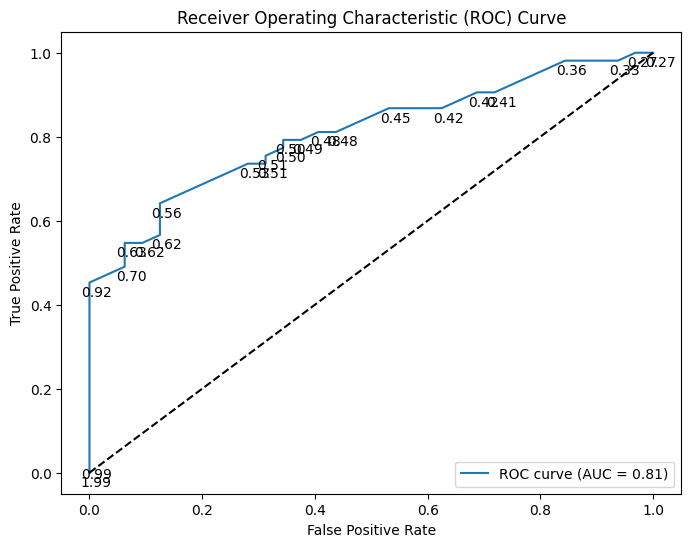

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression


LG = LogisticRegression()
LG.fit(X_train, y_train)
y_pred_prob = LG.predict_proba(X_train)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display threshold values as annotations
for i, threshold in enumerate(thresholds):
    plt.annotate('{:.2f}'.format(threshold), (fpr[i], tpr[i]), textcoords="offset points", xytext=(5, -10), ha='center')

plt.show()






In [19]:
from sklearn.metrics import confusion_matrix

LG = LogisticRegression()
LG.fit(X_train, y_train)
# Predict on the test set

print("Before:>")
print('Training Accuracy: ', LG.score(X_train,y_train))
print('Testing Accuracy ', LG.score(X_test, y_test))
tn, fp, fn, tp = confusion_matrix(y_train,LG.predict(X_train)).ravel()
print('Training True Positive Rate: ', (tp)/(tp+fn))

tn, fp, fn, tp = confusion_matrix(y_test,LG.predict(X_test)).ravel()
print('Testing True Positive Rate: ', (tp)/(tp+fn))



Before:>
Training Accuracy:  0.7294117647058823
Testing Accuracy  0.45454545454545453
Training True Positive Rate:  0.7735849056603774
Testing True Positive Rate:  0.5714285714285714


In [20]:
print("After:>")
y_pred_train = LG.predict_proba(X_train)
y_pred_test = LG.predict_proba(X_test)
result_train = np.where(y_pred_train[:,1] < 0.42, -1, 1)
result_test = np.where(y_pred_test[:,1] < 0.42, -1, 1)

print('Training Accuracy: ', LG.score(X_train,result_train))
print('Testing Accuracy ', LG.score(X_test, result_test))

tn, fp, fn, tp = confusion_matrix(y_train,result_train).ravel()
print('Training True Positive Rate: ', (tp)/(tp+fn))

tn, fp, fn, tp = confusion_matrix(y_test,result_test).ravel()
print('Testing True Positive Rate: ', (tp)/(tp+fn))



After:>
Training Accuracy:  0.8352941176470589
Testing Accuracy  0.8181818181818182
Training True Positive Rate:  0.8679245283018868
Testing True Positive Rate:  0.7857142857142857


# > *Predicting a new URL if its a Phishing or not.*

In [21]:
new_url = 'https://www.google.com'

In [22]:
df.head()

,URL_Length,having_At_Symbol,double_slash_redirecting,HavingHyphen,Page_Rank,Google_Index,Result
0,1,1,-1,-1,-1,1,-1
1,1,1,1,-1,-1,1,-1
2,0,1,1,-1,-1,1,-1
4,0,1,1,-1,-1,1,1
5,0,1,-1,-1,-1,1,1


> *1 means legitimate, 0 is suspicious and -1 is phishing.*

In [23]:
url_len = len(new_url)
URL_Length = -1
if url_len < 54:
    URL_Length = 1
elif url_len >= 54 and url_len <=75:
    URL_Length = 0


In [24]:
having_At_Symbol = -1
if new_url.find("@")==-1:
    having_At_Symbol = 1
print(having_At_Symbol)

1


In [25]:
try:
    position = new_url.index("//")
except ValueError:
    double_slash_redirecting=-1
if position+1 > 7:
    double_slash_redirecting=-1
else:
    double_slash_redirecting=1
print(double_slash_redirecting)

1


In [26]:
HavingHyphen = -1
if new_url.find("-")==-1:
    HavingHyphen = 1
print(HavingHyphen)

1


> *Page Rank value is received through api from https://www.domcop.com/openpagerank/documentation*

In [27]:
import requests
from urllib.parse import urlparse


headers = {'API-OPR':'c8g4404gswswcok8s0k4404ko4g00oo8w4ks84g4'}
requested_url = 'https://www.google.com/docs/about/'
parsed_url = urlparse(requested_url)
domain = parsed_url.netloc
url = 'https://openpagerank.com/api/v1.0/getPageRank?domains%5B0%5D=' + domain
request = requests.get(url, headers=headers)
result = request.json()


In [28]:
page_rank = result['response'][0]['page_rank_decimal']
if page_rank < 20:
    Page_Rank = -1
else:
    Page_Rank = 1
print(Page_Rank)

-1


In [29]:
requested_url = 'http://ebrpnvvjgd.duckdns.org'
parsed_url = urlparse(requested_url)
domain = parsed_url.netloc
domain

'ebrpnvvjgd.duckdns.org'

In [30]:
import re
import requests
from bs4 import BeautifulSoup


Google_Index = -1

google = "https://www.google.com/search?q=site:" + domain + "&hl=en"
response = requests.get(google, cookies={"CONSENT": "YES+1"})
soup = BeautifulSoup(response.content, "html.parser")
not_indexed = re.compile("did not match any documents")

if soup(text=not_indexed):
  Google_Index =-1
else:
  Google_Index= 1
print(Google_Index)

-1


In [31]:
df.head()

,URL_Length,having_At_Symbol,double_slash_redirecting,HavingHyphen,Page_Rank,Google_Index,Result
0,1,1,-1,-1,-1,1,-1
1,1,1,1,-1,-1,1,-1
2,0,1,1,-1,-1,1,-1
4,0,1,1,-1,-1,1,1
5,0,1,-1,-1,-1,1,1


In [32]:
X_pred =pd.DataFrame({'URL_Length':[URL_Length], 'having_At_Symbol':[having_At_Symbol], 'double_slash_redirecting':[double_slash_redirecting], 'HavingHyphen':[HavingHyphen], 'Page_Rank':[Page_Rank], 'Google_Index':[Google_Index]}) 
X_pred.columns = X_train.columns
X_pred

,URL_Length,having_At_Symbol,double_slash_redirecting,HavingHyphen,Page_Rank,Google_Index
0,1,1,1,1,-1,-1


In [33]:
LG.predict(X_pred)

array([1])

# > *Saving the model*

In [34]:
import pickle

# Save the model to a file using pickle
filename = 'logistic_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LG, file)

In [35]:
# Load the model from the pickle file
filename = 'logistic_regression_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
loaded_model.predict(X_pred)

array([1])